### Decisions to make
### 1. 
1. 
```
data['season_end_top_10'] = data.groupby('season')['driver_points'].transform(lambda x: x >= x.nlargest(10).min())
y = data['season_end_top_10']
```
2. 
```
data['top_10_finish'] = np.where(data['podium'] <= 10, 1, 0)
y = data['top_10_finish']
```
3. 
```
y = data['podium'] 
```
Key Differenced: 
* The first method determines if a driver finished in the top 10 in terms of points at the end of a season.
* The first method uses group-wise operation (grouping by 'season'), while the second line applies a condition to each row independently.
* The second method simply marks whether a driver finished in the top 10 in a particular event (not considering the entire season).
* The third method is just something I tried, seem pretty bad.

From the looks of it, method 1 makes best predictions. Gets all first 3 places correct with RL and NBC.

### 2. 
What kind of accuracy do we want to calculate?
1. In top 10 (True/False)
2. By standing

Currently, I am computing the accuracy with top 10 seasonal standing, i.e., final standing, by `driver_name`.
```
accuracy = calc_acc(y_test, y_pred)
```
where `y_pred` is computed by:
1. predicting the ranking of each round of a season
2. assign points to the top 10
3. sum all points by driver
4. return driver_name of the top 10 drivers with most point in sorted order

and `y_test` is computed in similar fasion but using real data.

I personally think this accuracy isn't that meaningful because we are only comparing a single season. 

If we were to predict the seasonal top 10 for every season, this method of computing accuracy would make more sense.

The NDCG score is quite interesting because it evaluates the ranking even if they do not match exactly (unlike accuracy). 

### 3. 
What feature do we want to include for training?
1. With weather
2. Without weather
3. All features

I've tried the feature set that Nishtha/Daniel provided (with weather) and the feature set that Joan/Mayesha has provided (without weather) and it seems like the model performed better without weather.

During training, I ran into warnings `have not converged after reaching max_iter` for both LR and NN. Maybe less features is better. 

# Predictions of Standing for Each Round with Chosen Features

Round 1 predictions:


,driver_name,podium,pred_podium
0,sergio perez,18.0,1
1,kevin magnussen,5.0,2
2,max verstappen,19.0,3
3,guanyu zhou,10.0,4
4,valtteri bottas,6.0,5
5,lewis hamilton,3.0,6
6,charles leclerc,1.0,7
7,george russell,4.0,8
8,nico hulkenberg,17.0,9
9,lance stroll,12.0,10


true_relevances: [2, 7, 1, 5, 6, 9, 10, 8, 3, 4]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 2  7  1  5  6  9 10  8  3  4]
Round 2 predictions:


,driver_name,podium,pred_podium
0,charles leclerc,2.0,1
1,carlos sainz,3.0,2
2,kevin magnussen,9.0,3
3,lewis hamilton,10.0,4
4,george russell,5.0,5
5,valtteri bottas,15.0,6
6,esteban ocon,6.0,7
7,mick schumacher,20.0,8
8,guanyu zhou,11.0,9
9,fernando alonso,16.0,10


true_relevances: [10, 9, 6, 5, 8, 3, 7, 1, 4, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  9  6  5  8  3  7  1  4  2]
Round 3 predictions:


,driver_name,podium,pred_podium
0,charles leclerc,1.0,1
1,carlos sainz,20.0,2
2,max verstappen,18.0,3
3,george russell,3.0,4
4,lewis hamilton,4.0,5
5,sergio perez,2.0,6
6,esteban ocon,7.0,7
7,kevin magnussen,14.0,8
8,valtteri bottas,8.0,9
9,fernando alonso,17.0,10


true_relevances: [10, 1, 2, 8, 7, 9, 6, 4, 5, 3]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  1  2  8  7  9  6  4  5  3]
Round 4 predictions:


,driver_name,podium,pred_podium
0,charles leclerc,6.0,1
1,carlos sainz,20.0,2
2,george russell,4.0,3
3,max verstappen,1.0,4
4,sergio perez,2.0,5
5,lewis hamilton,13.0,6
6,esteban ocon,14.0,7
7,lando norris,3.0,8
8,kevin magnussen,9.0,9
9,daniel ricciardo,18.0,10


true_relevances: [6, 1, 7, 10, 9, 4, 3, 8, 5, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 6  1  7 10  9  4  3  8  5  2]
Round 5 predictions:


,driver_name,podium,pred_podium
0,charles leclerc,2.0,1
1,max verstappen,1.0,2
2,sergio perez,4.0,3
3,carlos sainz,3.0,4
4,lando norris,19.0,5
5,george russell,5.0,6
6,valtteri bottas,7.0,7
7,lewis hamilton,6.0,8
8,daniel ricciardo,13.0,9
9,kevin magnussen,16.0,10


true_relevances: [9, 10, 7, 8, 1, 6, 4, 5, 3, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 9 10  7  8  1  6  4  5  3  2]
Round 6 predictions:


,driver_name,podium,pred_podium
0,charles leclerc,20.0,1
1,max verstappen,1.0,2
2,sergio perez,2.0,3
3,carlos sainz,4.0,4
4,george russell,3.0,5
5,lando norris,8.0,6
6,lewis hamilton,5.0,7
7,valtteri bottas,6.0,8
8,esteban ocon,7.0,9
9,daniel ricciardo,12.0,10


true_relevances: [1, 10, 9, 7, 8, 3, 6, 5, 4, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 1 10  9  7  8  3  6  5  4  2]
Round 7 predictions:


,driver_name,podium,pred_podium
0,max verstappen,3.0,1
1,charles leclerc,4.0,2
2,sergio perez,1.0,3
3,carlos sainz,2.0,4
4,george russell,5.0,5
5,lewis hamilton,8.0,6
6,lando norris,6.0,7
7,valtteri bottas,9.0,8
8,esteban ocon,12.0,9
9,kevin magnussen,20.0,10


true_relevances: [8, 7, 10, 9, 6, 4, 5, 3, 2, 1]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 8  7 10  9  6  4  5  3  2  1]
Round 8 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,2.0,2
2,charles leclerc,19.0,3
3,carlos sainz,20.0,4
4,george russell,3.0,5
5,lando norris,9.0,6
6,lewis hamilton,4.0,7
7,valtteri bottas,11.0,8
8,daniel ricciardo,8.0,9
9,esteban ocon,10.0,10


true_relevances: [10, 9, 2, 1, 8, 5, 7, 3, 6, 4]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  9  2  1  8  5  7  3  6  4]
Round 9 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,20.0,2
2,charles leclerc,5.0,3
3,george russell,4.0,4
4,carlos sainz,2.0,5
5,lando norris,15.0,6
6,lewis hamilton,3.0,7
7,valtteri bottas,7.0,8
8,esteban ocon,6.0,9
9,fernando alonso,9.0,10


true_relevances: [10, 1, 6, 7, 9, 2, 8, 4, 5, 3]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  1  6  7  9  2  8  4  5  3]
Round 10 predictions:


,driver_name,podium,pred_podium
0,max verstappen,7.0,1
1,sergio perez,2.0,2
2,charles leclerc,4.0,3
3,george russell,18.0,4
4,carlos sainz,1.0,5
5,lewis hamilton,3.0,6
6,lando norris,6.0,7
7,valtteri bottas,17.0,8
8,esteban ocon,15.0,9
9,fernando alonso,5.0,10


true_relevances: [4, 9, 7, 1, 10, 8, 5, 2, 3, 6]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 4  9  7  1 10  8  5  2  3  6]
Round 11 predictions:


,driver_name,podium,pred_podium
0,max verstappen,2.0,1
1,sergio perez,20.0,2
2,charles leclerc,1.0,3
3,carlos sainz,18.0,4
4,george russell,4.0,5
5,lewis hamilton,3.0,6
6,lando norris,7.0,7
7,valtteri bottas,11.0,8
8,esteban ocon,5.0,9
9,fernando alonso,10.0,10


true_relevances: [9, 1, 10, 2, 7, 8, 5, 3, 6, 4]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 9  1 10  2  7  8  5  3  6  4]
Round 12 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,charles leclerc,19.0,2
2,sergio perez,4.0,3
3,carlos sainz,5.0,4
4,george russell,3.0,5
5,lewis hamilton,2.0,6
6,lando norris,7.0,7
7,esteban ocon,8.0,8
8,valtteri bottas,14.0,9
9,fernando alonso,6.0,10


true_relevances: [10, 1, 7, 6, 8, 9, 4, 3, 2, 5]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  1  7  6  8  9  4  3  2  5]
Round 13 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,charles leclerc,6.0,2
2,sergio perez,5.0,3
3,carlos sainz,4.0,4
4,george russell,3.0,5
5,lewis hamilton,2.0,6
6,lando norris,7.0,7
7,esteban ocon,9.0,8
8,fernando alonso,8.0,9
9,valtteri bottas,20.0,10


true_relevances: [10, 5, 6, 7, 8, 9, 4, 2, 3, 1]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  5  6  7  8  9  4  2  3  1]
Round 14 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,2.0,2
2,charles leclerc,6.0,3
3,carlos sainz,3.0,4
4,george russell,4.0,5
5,lewis hamilton,20.0,6
6,lando norris,12.0,7
7,esteban ocon,7.0,8
8,fernando alonso,5.0,9
9,valtteri bottas,19.0,10


true_relevances: [10, 9, 5, 8, 7, 1, 3, 4, 6, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  9  5  8  7  1  3  4  6  2]
Round 15 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,5.0,2
2,charles leclerc,3.0,3
3,carlos sainz,8.0,4
4,george russell,2.0,5
5,lewis hamilton,4.0,6
6,lando norris,7.0,7
7,esteban ocon,9.0,8
8,fernando alonso,6.0,9
9,valtteri bottas,19.0,10


true_relevances: [10, 6, 8, 3, 9, 7, 4, 2, 5, 1]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  6  8  3  9  7  4  2  5  1]
Round 16 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,6.0,2
2,charles leclerc,2.0,3
3,carlos sainz,4.0,4
4,george russell,3.0,5
5,lewis hamilton,5.0,6
6,lando norris,7.0,7
7,fernando alonso,19.0,8
8,esteban ocon,11.0,9
9,valtteri bottas,13.0,10


true_relevances: [10, 5, 9, 7, 8, 6, 4, 1, 3, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  5  9  7  8  6  4  1  3  2]
Round 17 predictions:


,driver_name,podium,pred_podium
0,max verstappen,7.0,1
1,sergio perez,1.0,2
2,charles leclerc,2.0,3
3,carlos sainz,3.0,4
4,george russell,14.0,5
5,lewis hamilton,9.0,6
6,lando norris,4.0,7
7,esteban ocon,16.0,8
8,fernando alonso,18.0,9
9,valtteri bottas,11.0,10


true_relevances: [6, 10, 9, 8, 3, 5, 7, 2, 1, 4]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 6 10  9  8  3  5  7  2  1  4]
Round 18 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,2.0,2
2,charles leclerc,3.0,3
3,carlos sainz,19.0,4
4,george russell,8.0,5
5,lewis hamilton,5.0,6
6,lando norris,10.0,7
7,esteban ocon,4.0,8
8,fernando alonso,7.0,9
9,valtteri bottas,15.0,10


true_relevances: [10, 9, 8, 1, 4, 6, 3, 7, 5, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  9  8  1  4  6  3  7  5  2]
Round 19 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,4.0,2
2,charles leclerc,3.0,3
3,carlos sainz,20.0,4
4,george russell,5.0,5
5,lewis hamilton,2.0,6
6,lando norris,6.0,7
7,esteban ocon,11.0,8
8,fernando alonso,7.0,9
9,valtteri bottas,19.0,10


true_relevances: [10, 7, 8, 1, 6, 9, 5, 3, 4, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  7  8  1  6  9  5  3  4  2]
Round 20 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,3.0,2
2,charles leclerc,6.0,3
3,george russell,4.0,4
4,carlos sainz,5.0,5
5,lewis hamilton,2.0,6
6,lando norris,9.0,7
7,esteban ocon,8.0,8
8,fernando alonso,19.0,9
9,valtteri bottas,10.0,10


true_relevances: [10, 8, 5, 7, 6, 9, 3, 4, 1, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  8  5  7  6  9  3  4  1  2]
Round 21 predictions:


,driver_name,podium,pred_podium
0,max verstappen,6.0,1
1,sergio perez,7.0,2
2,charles leclerc,4.0,3
3,carlos sainz,3.0,4
4,george russell,1.0,5
5,lewis hamilton,2.0,6
6,lando norris,18.0,7
7,esteban ocon,8.0,8
8,fernando alonso,5.0,9
9,valtteri bottas,9.0,10


true_relevances: [5, 4, 7, 8, 10, 9, 1, 3, 6, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 5  4  7  8 10  9  1  3  6  2]
Round 22 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,3.0,2
2,charles leclerc,2.0,3
3,george russell,5.0,4
4,carlos sainz,4.0,5
5,lewis hamilton,18.0,6
6,lando norris,6.0,7
7,esteban ocon,7.0,8
8,fernando alonso,20.0,9
9,valtteri bottas,15.0,10


true_relevances: [10, 8, 9, 6, 7, 2, 5, 4, 1, 3]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  8  9  6  7  2  5  4  1  3]
Logistic Regression


,y_test,y_pred
0,max verstappen,max verstappen
1,charles leclerc,charles leclerc
2,sergio perez,sergio perez
3,george russell,carlos sainz
4,lewis hamilton,george russell
5,carlos sainz,lewis hamilton
6,lando norris,lando norris
7,esteban ocon,esteban ocon
8,fernando alonso,valtteri bottas
9,valtteri bottas,kevin magnussen


Round 1 predictions:


,driver_name,podium,pred_podium
0,nicholas latifi,16.0,1
1,alex albon,13.0,2
2,daniel ricciardo,14.0,3
3,yuki tsunoda,8.0,4
4,nico hulkenberg,17.0,5
5,esteban ocon,7.0,6
6,lance stroll,12.0,7
7,guanyu zhou,10.0,8
8,mick schumacher,11.0,9
9,pierre gasly,20.0,10


true_relevances: [3, 5, 4, 9, 2, 10, 6, 8, 7, 1]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 3  5  4  9  2 10  6  8  7  1]
Round 2 predictions:


,driver_name,podium,pred_podium
0,guanyu zhou,11.0,1
1,fernando alonso,16.0,2
2,mick schumacher,20.0,3
3,yuki tsunoda,19.0,4
4,pierre gasly,8.0,5
5,lance stroll,13.0,6
6,esteban ocon,6.0,7
7,kevin magnussen,9.0,8
8,george russell,5.0,9
9,valtteri bottas,15.0,10


true_relevances: [6, 3, 1, 2, 8, 5, 9, 7, 10, 4]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 6  3  1  2  8  5  9  7 10  4]
Round 3 predictions:


,driver_name,podium,pred_podium
0,yuki tsunoda,15.0,1
1,george russell,3.0,2
2,lando norris,5.0,3
3,kevin magnussen,14.0,4
4,pierre gasly,9.0,5
5,lewis hamilton,4.0,6
6,valtteri bottas,8.0,7
7,daniel ricciardo,6.0,8
8,guanyu zhou,11.0,9
9,mick schumacher,13.0,10


true_relevances: [1, 10, 8, 2, 5, 9, 6, 7, 4, 3]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 1 10  8  2  5  9  6  7  4  3]
Round 4 predictions:


,driver_name,podium,pred_podium
0,esteban ocon,14.0,1
1,lando norris,3.0,2
2,kevin magnussen,9.0,3
3,mick schumacher,17.0,4
4,valtteri bottas,5.0,5
5,max verstappen,1.0,6
6,pierre gasly,12.0,7
7,charles leclerc,6.0,8
8,yuki tsunoda,7.0,9
9,lewis hamilton,13.0,10


true_relevances: [2, 9, 5, 1, 8, 10, 4, 7, 6, 3]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 2  9  5  1  8 10  4  7  6  3]
Round 5 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,carlos sainz,3.0,2
2,lando norris,19.0,3
3,kevin magnussen,16.0,4
4,daniel ricciardo,13.0,5
5,valtteri bottas,7.0,6
6,yuki tsunoda,12.0,7
7,charles leclerc,2.0,8
8,sebastian vettel,17.0,9
9,esteban ocon,8.0,10


true_relevances: [10, 8, 1, 3, 4, 7, 5, 9, 2, 6]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  8  1  3  4  7  5  9  2  6]
Round 6 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,2.0,2
2,lando norris,8.0,3
3,valtteri bottas,6.0,4
4,daniel ricciardo,12.0,5
5,esteban ocon,7.0,6
6,kevin magnussen,17.0,7
7,charles leclerc,20.0,8
8,carlos sainz,4.0,9
9,yuki tsunoda,10.0,10


true_relevances: [10, 9, 5, 7, 3, 6, 2, 1, 8, 4]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  9  5  7  3  6  2  1  8  4]
Round 7 predictions:


,driver_name,podium,pred_podium
0,max verstappen,3.0,1
1,charles leclerc,4.0,2
2,lewis hamilton,8.0,3
3,valtteri bottas,9.0,4
4,sergio perez,1.0,5
5,george russell,5.0,6
6,kevin magnussen,20.0,7
7,daniel ricciardo,13.0,8
8,esteban ocon,12.0,9
9,yuki tsunoda,17.0,10


true_relevances: [9, 8, 6, 5, 10, 7, 1, 3, 4, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 9  8  6  5 10  7  1  3  4  2]
Round 8 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,2.0,2
2,charles leclerc,19.0,3
3,lewis hamilton,4.0,4
4,george russell,3.0,5
5,carlos sainz,20.0,6
6,esteban ocon,10.0,7
7,lando norris,9.0,8
8,valtteri bottas,11.0,9
9,yuki tsunoda,13.0,10


true_relevances: [10, 9, 2, 7, 8, 1, 5, 6, 4, 3]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  9  2  7  8  1  5  6  4  3]
Round 9 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,20.0,2
2,charles leclerc,5.0,3
3,lewis hamilton,3.0,4
4,valtteri bottas,7.0,5
5,george russell,4.0,6
6,carlos sainz,2.0,7
7,lando norris,15.0,8
8,esteban ocon,6.0,9
9,daniel ricciardo,11.0,10


true_relevances: [10, 1, 6, 8, 4, 7, 9, 2, 5, 3]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  1  6  8  4  7  9  2  5  3]
Round 10 predictions:


,driver_name,podium,pred_podium
0,max verstappen,7.0,1
1,sergio perez,2.0,2
2,charles leclerc,4.0,3
3,valtteri bottas,17.0,4
4,carlos sainz,1.0,5
5,esteban ocon,15.0,6
6,george russell,18.0,7
7,guanyu zhou,19.0,8
8,daniel ricciardo,13.0,9
9,fernando alonso,5.0,10


true_relevances: [6, 9, 8, 3, 10, 4, 2, 1, 5, 7]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 6  9  8  3 10  4  2  1  5  7]
Round 11 predictions:


,driver_name,podium,pred_podium
0,max verstappen,2.0,1
1,sergio perez,20.0,2
2,charles leclerc,1.0,3
3,carlos sainz,18.0,4
4,lewis hamilton,3.0,5
5,george russell,4.0,6
6,kevin magnussen,8.0,7
7,valtteri bottas,11.0,8
8,lando norris,7.0,9
9,esteban ocon,5.0,10


true_relevances: [9, 1, 10, 2, 8, 7, 4, 3, 5, 6]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 9  1 10  2  8  7  4  3  5  6]
Round 12 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,4.0,2
2,charles leclerc,19.0,3
3,carlos sainz,5.0,4
4,lewis hamilton,2.0,5
5,esteban ocon,8.0,6
6,george russell,3.0,7
7,fernando alonso,6.0,8
8,lando norris,7.0,9
9,valtteri bottas,14.0,10


true_relevances: [10, 7, 1, 6, 9, 3, 8, 5, 4, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  7  1  6  9  3  8  5  4  2]
Round 13 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,5.0,2
2,charles leclerc,6.0,3
3,carlos sainz,4.0,4
4,lewis hamilton,2.0,5
5,george russell,3.0,6
6,esteban ocon,9.0,7
7,fernando alonso,8.0,8
8,lando norris,7.0,9
9,valtteri bottas,20.0,10


true_relevances: [10, 6, 5, 7, 9, 8, 2, 3, 4, 1]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  6  5  7  9  8  2  3  4  1]
Round 14 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,2.0,2
2,charles leclerc,6.0,3
3,carlos sainz,3.0,4
4,lewis hamilton,20.0,5
5,george russell,4.0,6
6,lando norris,12.0,7
7,esteban ocon,7.0,8
8,fernando alonso,5.0,9
9,daniel ricciardo,15.0,10


true_relevances: [10, 9, 5, 8, 1, 7, 3, 4, 6, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  9  5  8  1  7  3  4  6  2]
Round 15 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,5.0,2
2,charles leclerc,3.0,3
3,carlos sainz,8.0,4
4,george russell,2.0,5
5,lewis hamilton,4.0,6
6,esteban ocon,9.0,7
7,lando norris,7.0,8
8,kevin magnussen,15.0,9
9,fernando alonso,6.0,10


true_relevances: [10, 6, 8, 3, 9, 7, 2, 4, 1, 5]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  6  8  3  9  7  2  4  1  5]
Round 16 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,6.0,2
2,charles leclerc,2.0,3
3,carlos sainz,4.0,4
4,lewis hamilton,5.0,5
5,george russell,3.0,6
6,esteban ocon,11.0,7
7,lando norris,7.0,8
8,fernando alonso,19.0,9
9,valtteri bottas,13.0,10


true_relevances: [10, 5, 9, 7, 6, 8, 3, 4, 1, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  5  9  7  6  8  3  4  1  2]
Round 17 predictions:


,driver_name,podium,pred_podium
0,max verstappen,7.0,1
1,sergio perez,1.0,2
2,charles leclerc,2.0,3
3,carlos sainz,3.0,4
4,george russell,14.0,5
5,lewis hamilton,9.0,6
6,lando norris,4.0,7
7,esteban ocon,16.0,8
8,fernando alonso,18.0,9
9,valtteri bottas,11.0,10


true_relevances: [6, 10, 9, 8, 3, 5, 7, 2, 1, 4]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 6 10  9  8  3  5  7  2  1  4]
Round 18 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,2.0,2
2,charles leclerc,3.0,3
3,carlos sainz,19.0,4
4,george russell,8.0,5
5,lando norris,10.0,6
6,lewis hamilton,5.0,7
7,esteban ocon,4.0,8
8,valtteri bottas,15.0,9
9,daniel ricciardo,11.0,10


true_relevances: [10, 9, 8, 1, 5, 4, 6, 7, 2, 3]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  9  8  1  5  4  6  7  2  3]
Round 19 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,4.0,2
2,charles leclerc,3.0,3
3,carlos sainz,20.0,4
4,george russell,5.0,5
5,lando norris,6.0,6
6,lewis hamilton,2.0,7
7,esteban ocon,11.0,8
8,fernando alonso,7.0,9
9,valtteri bottas,19.0,10


true_relevances: [10, 7, 8, 1, 6, 5, 9, 3, 4, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  7  8  1  6  5  9  3  4  2]
Round 20 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,3.0,2
2,charles leclerc,6.0,3
3,carlos sainz,5.0,4
4,lando norris,9.0,5
5,lewis hamilton,2.0,6
6,george russell,4.0,7
7,fernando alonso,19.0,8
8,valtteri bottas,10.0,9
9,esteban ocon,8.0,10


true_relevances: [10, 8, 5, 6, 3, 9, 7, 1, 2, 4]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  8  5  6  3  9  7  1  2  4]
Round 21 predictions:


,driver_name,podium,pred_podium
0,max verstappen,6.0,1
1,sergio perez,7.0,2
2,charles leclerc,4.0,3
3,carlos sainz,3.0,4
4,lewis hamilton,2.0,5
5,george russell,1.0,6
6,lando norris,18.0,7
7,valtteri bottas,9.0,8
8,sebastian vettel,11.0,9
9,fernando alonso,5.0,10


true_relevances: [5, 4, 7, 8, 9, 10, 1, 3, 2, 6]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 5  4  7  8  9 10  1  3  2  6]
Round 22 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,3.0,2
2,charles leclerc,2.0,3
3,carlos sainz,4.0,4
4,george russell,5.0,5
5,lewis hamilton,18.0,6
6,lando norris,6.0,7
7,fernando alonso,20.0,8
8,esteban ocon,7.0,9
9,sebastian vettel,10.0,10


true_relevances: [10, 8, 9, 7, 6, 2, 5, 1, 4, 3]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  8  9  7  6  2  5  1  4  3]
Neural Network


,y_test,y_pred
0,max verstappen,max verstappen
1,charles leclerc,sergio perez
2,sergio perez,charles leclerc
3,george russell,carlos sainz
4,lewis hamilton,george russell
5,carlos sainz,lewis hamilton
6,lando norris,lando norris
7,esteban ocon,esteban ocon
8,fernando alonso,valtteri bottas
9,valtteri bottas,kevin magnussen


Round 1 predictions:


,driver_name,podium,pred_podium
0,charles leclerc,1.0,1
1,max verstappen,19.0,2
2,carlos sainz,2.0,3
3,george russell,4.0,4
4,sergio perez,18.0,5
5,lewis hamilton,3.0,6
6,valtteri bottas,6.0,7
7,kevin magnussen,5.0,8
8,fernando alonso,9.0,9
9,lando norris,15.0,10


true_relevances: [10, 1, 9, 7, 2, 8, 5, 6, 4, 3]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  1  9  7  2  8  5  6  4  3]
Round 2 predictions:


,driver_name,podium,pred_podium
0,charles leclerc,2.0,1
1,carlos sainz,3.0,2
2,lewis hamilton,10.0,3
3,george russell,5.0,4
4,valtteri bottas,15.0,5
5,kevin magnussen,9.0,6
6,esteban ocon,6.0,7
7,mick schumacher,20.0,8
8,fernando alonso,16.0,9
9,guanyu zhou,11.0,10


true_relevances: [10, 9, 5, 8, 3, 6, 7, 1, 2, 4]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  9  5  8  3  6  7  1  2  4]
Round 3 predictions:


,driver_name,podium,pred_podium
0,charles leclerc,1.0,1
1,carlos sainz,20.0,2
2,max verstappen,18.0,3
3,george russell,3.0,4
4,lewis hamilton,4.0,5
5,sergio perez,2.0,6
6,esteban ocon,7.0,7
7,kevin magnussen,14.0,8
8,fernando alonso,17.0,9
9,valtteri bottas,8.0,10


true_relevances: [10, 1, 2, 8, 7, 9, 6, 4, 3, 5]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  1  2  8  7  9  6  4  3  5]
Round 4 predictions:


,driver_name,podium,pred_podium
0,charles leclerc,6.0,1
1,carlos sainz,20.0,2
2,george russell,4.0,3
3,sergio perez,2.0,4
4,lewis hamilton,13.0,5
5,max verstappen,1.0,6
6,lando norris,3.0,7
7,esteban ocon,14.0,8
8,daniel ricciardo,18.0,9
9,kevin magnussen,9.0,10


true_relevances: [6, 1, 7, 9, 4, 10, 8, 3, 2, 5]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 6  1  7  9  4 10  8  3  2  5]
Round 5 predictions:


,driver_name,podium,pred_podium
0,charles leclerc,2.0,1
1,sergio perez,4.0,2
2,carlos sainz,3.0,3
3,max verstappen,1.0,4
4,george russell,5.0,5
5,lewis hamilton,6.0,6
6,lando norris,19.0,7
7,daniel ricciardo,13.0,8
8,valtteri bottas,7.0,9
9,esteban ocon,8.0,10


true_relevances: [9, 7, 8, 10, 6, 5, 1, 2, 4, 3]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 9  7  8 10  6  5  1  2  4  3]
Round 6 predictions:


,driver_name,podium,pred_podium
0,charles leclerc,20.0,1
1,max verstappen,1.0,2
2,carlos sainz,4.0,3
3,sergio perez,2.0,4
4,george russell,3.0,5
5,lewis hamilton,5.0,6
6,lando norris,8.0,7
7,valtteri bottas,6.0,8
8,daniel ricciardo,12.0,9
9,esteban ocon,7.0,10


true_relevances: [1, 10, 7, 9, 8, 6, 3, 5, 2, 4]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 1 10  7  9  8  6  3  5  2  4]
Round 7 predictions:


,driver_name,podium,pred_podium
0,max verstappen,3.0,1
1,sergio perez,1.0,2
2,charles leclerc,4.0,3
3,carlos sainz,2.0,4
4,george russell,5.0,5
5,lewis hamilton,8.0,6
6,lando norris,6.0,7
7,valtteri bottas,9.0,8
8,daniel ricciardo,13.0,9
9,esteban ocon,12.0,10


true_relevances: [8, 10, 7, 9, 6, 4, 5, 3, 1, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 8 10  7  9  6  4  5  3  1  2]
Round 8 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,2.0,2
2,charles leclerc,19.0,3
3,carlos sainz,20.0,4
4,george russell,3.0,5
5,lewis hamilton,4.0,6
6,lando norris,9.0,7
7,daniel ricciardo,8.0,8
8,valtteri bottas,11.0,9
9,esteban ocon,10.0,10


true_relevances: [10, 9, 2, 1, 8, 7, 5, 6, 3, 4]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  9  2  1  8  7  5  6  3  4]
Round 9 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,20.0,2
2,carlos sainz,2.0,3
3,charles leclerc,5.0,4
4,george russell,4.0,5
5,lewis hamilton,3.0,6
6,lando norris,15.0,7
7,esteban ocon,6.0,8
8,fernando alonso,9.0,9
9,daniel ricciardo,11.0,10


true_relevances: [10, 1, 9, 6, 7, 8, 2, 5, 4, 3]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  1  9  6  7  8  2  5  4  3]
Round 10 predictions:


,driver_name,podium,pred_podium
0,max verstappen,7.0,1
1,sergio perez,2.0,2
2,charles leclerc,4.0,3
3,carlos sainz,1.0,4
4,george russell,18.0,5
5,lewis hamilton,3.0,6
6,lando norris,6.0,7
7,esteban ocon,15.0,8
8,fernando alonso,5.0,9
9,valtteri bottas,17.0,10


true_relevances: [4, 9, 7, 10, 1, 8, 5, 3, 6, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 4  9  7 10  1  8  5  3  6  2]
Round 11 predictions:


,driver_name,podium,pred_podium
0,max verstappen,2.0,1
1,sergio perez,20.0,2
2,charles leclerc,1.0,3
3,carlos sainz,18.0,4
4,george russell,4.0,5
5,lewis hamilton,3.0,6
6,lando norris,7.0,7
7,esteban ocon,5.0,8
8,fernando alonso,10.0,9
9,valtteri bottas,11.0,10


true_relevances: [9, 1, 10, 2, 7, 8, 5, 6, 4, 3]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 9  1 10  2  7  8  5  6  4  3]
Round 12 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,charles leclerc,19.0,2
2,sergio perez,4.0,3
3,carlos sainz,5.0,4
4,george russell,3.0,5
5,lewis hamilton,2.0,6
6,lando norris,7.0,7
7,esteban ocon,8.0,8
8,fernando alonso,6.0,9
9,daniel ricciardo,9.0,10


true_relevances: [10, 1, 7, 6, 8, 9, 4, 3, 5, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  1  7  6  8  9  4  3  5  2]
Round 13 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,charles leclerc,6.0,2
2,carlos sainz,4.0,3
3,sergio perez,5.0,4
4,george russell,3.0,5
5,lewis hamilton,2.0,6
6,lando norris,7.0,7
7,esteban ocon,9.0,8
8,fernando alonso,8.0,9
9,daniel ricciardo,15.0,10


true_relevances: [10, 5, 7, 6, 8, 9, 4, 2, 3, 1]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  5  7  6  8  9  4  2  3  1]
Round 14 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,2.0,2
2,charles leclerc,6.0,3
3,carlos sainz,3.0,4
4,george russell,4.0,5
5,lewis hamilton,20.0,6
6,lando norris,12.0,7
7,esteban ocon,7.0,8
8,fernando alonso,5.0,9
9,daniel ricciardo,15.0,10


true_relevances: [10, 9, 5, 8, 7, 1, 3, 4, 6, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  9  5  8  7  1  3  4  6  2]
Round 15 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,5.0,2
2,charles leclerc,3.0,3
3,carlos sainz,8.0,4
4,george russell,2.0,5
5,lewis hamilton,4.0,6
6,esteban ocon,9.0,7
7,fernando alonso,6.0,8
8,lando norris,7.0,9
9,daniel ricciardo,17.0,10


true_relevances: [10, 6, 8, 3, 9, 7, 2, 5, 4, 1]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  6  8  3  9  7  2  5  4  1]
Round 16 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,6.0,2
2,charles leclerc,2.0,3
3,carlos sainz,4.0,4
4,george russell,3.0,5
5,lewis hamilton,5.0,6
6,esteban ocon,11.0,7
7,fernando alonso,19.0,8
8,lando norris,7.0,9
9,valtteri bottas,13.0,10


true_relevances: [10, 5, 9, 7, 8, 6, 3, 1, 4, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  5  9  7  8  6  3  1  4  2]
Round 17 predictions:


,driver_name,podium,pred_podium
0,max verstappen,7.0,1
1,sergio perez,1.0,2
2,charles leclerc,2.0,3
3,carlos sainz,3.0,4
4,george russell,14.0,5
5,lewis hamilton,9.0,6
6,esteban ocon,16.0,7
7,fernando alonso,18.0,8
8,lando norris,4.0,9
9,valtteri bottas,11.0,10


true_relevances: [6, 10, 9, 8, 3, 5, 2, 1, 7, 4]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 6 10  9  8  3  5  2  1  7  4]
Round 18 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,2.0,2
2,charles leclerc,3.0,3
3,carlos sainz,19.0,4
4,george russell,8.0,5
5,lewis hamilton,5.0,6
6,lando norris,10.0,7
7,esteban ocon,4.0,8
8,fernando alonso,7.0,9
9,daniel ricciardo,11.0,10


true_relevances: [10, 9, 8, 1, 4, 6, 3, 7, 5, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  9  8  1  4  6  3  7  5  2]
Round 19 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,4.0,2
2,charles leclerc,3.0,3
3,carlos sainz,20.0,4
4,george russell,5.0,5
5,lewis hamilton,2.0,6
6,lando norris,6.0,7
7,esteban ocon,11.0,8
8,fernando alonso,7.0,9
9,valtteri bottas,19.0,10


true_relevances: [10, 7, 8, 1, 6, 9, 5, 3, 4, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  7  8  1  6  9  5  3  4  2]
Round 20 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,3.0,2
2,charles leclerc,6.0,3
3,carlos sainz,5.0,4
4,george russell,4.0,5
5,lewis hamilton,2.0,6
6,esteban ocon,8.0,7
7,fernando alonso,19.0,8
8,lando norris,9.0,9
9,valtteri bottas,10.0,10


true_relevances: [10, 8, 5, 6, 7, 9, 4, 1, 3, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  8  5  6  7  9  4  1  3  2]
Round 21 predictions:


,driver_name,podium,pred_podium
0,max verstappen,6.0,1
1,sergio perez,7.0,2
2,charles leclerc,4.0,3
3,george russell,1.0,4
4,carlos sainz,3.0,5
5,lewis hamilton,2.0,6
6,esteban ocon,8.0,7
7,fernando alonso,5.0,8
8,lando norris,18.0,9
9,valtteri bottas,9.0,10


true_relevances: [5, 4, 7, 10, 8, 9, 3, 6, 1, 2]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [ 5  4  7 10  8  9  3  6  1  2]
Round 22 predictions:


,driver_name,podium,pred_podium
0,max verstappen,1.0,1
1,sergio perez,3.0,2
2,charles leclerc,2.0,3
3,george russell,5.0,4
4,lewis hamilton,18.0,5
5,carlos sainz,4.0,6
6,esteban ocon,7.0,7
7,lando norris,6.0,8
8,fernando alonso,20.0,9
9,daniel ricciardo,9.0,10


true_relevances: [10, 8, 9, 6, 2, 7, 4, 5, 1, 3]
predicted_relevances: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
sorted_indices: [0 1 2 3 4 5 6 7 8 9]
mapped_true_relevances: [10  8  9  6  2  7  4  5  1  3]
Naiive Bayes Classifier


,y_test,y_pred
0,max verstappen,max verstappen
1,charles leclerc,charles leclerc
2,sergio perez,sergio perez
3,george russell,carlos sainz
4,lewis hamilton,george russell
5,carlos sainz,lewis hamilton
6,lando norris,lando norris
7,esteban ocon,esteban ocon
8,fernando alonso,fernando alonso
9,valtteri bottas,valtteri bottas


,model,accuracy,champion,champion_points,mean_mapped_relevance
0,LR,0.5,max verstappen,478,0.822617
1,NN,0.3,max verstappen,458,0.805553
2,NBC,0.7,max verstappen,471,0.844071


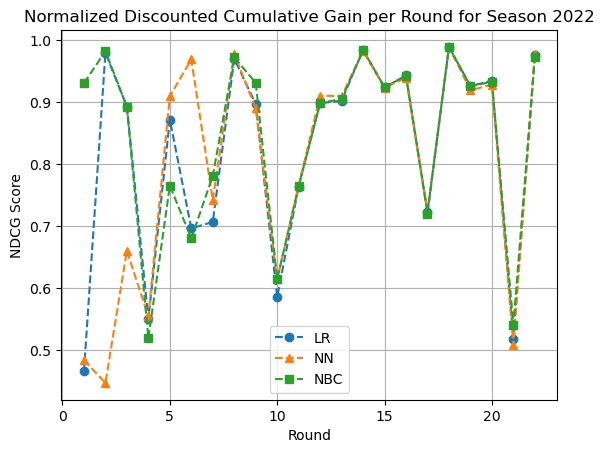

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

def calculate_dcg(relevances, p):
    dcg = 0
    for i in range(p):
        dcg += (2 ** relevances[i] - 1) / np.log2(i + 2)
    return dcg

def calculate_ndcg(relevances, p):
    dcg = calculate_dcg(relevances, p)
    idcg = calculate_dcg(sorted(relevances, reverse=True), p)
    return dcg / idcg if idcg != 0 else 0

def map_true_relevances_to_predicted_order(true_relevances, predicted_relevances):
    print(f"true_relevances: {true_relevances}")
    print(f"predicted_relevances: {predicted_relevances}")
    sorted_indices = np.argsort(predicted_relevances)[::-1]
    print(f"sorted_indices: {sorted_indices}")

    mapped_true_relevances = np.array(true_relevances)[sorted_indices]
    print(f"mapped_true_relevances: {mapped_true_relevances}")
    return mapped_true_relevances

#Finding season winners based on points
points_system = {1: 25, 2: 18, 3: 15, 4: 12, 5: 10, 6: 8, 7: 6, 8: 4, 9: 2, 10: 1}
# Function to assign points based on predicted position
def assign_points(df):
    df['predicted_points'] = df.groupby('round').cumcount() + 1
    df['predicted_points'] = df['predicted_points'].map(points_system).fillna(0)
    return df

def assign_relevance(values):
    # Sorting the list in ascending order
    sorted_values = sorted(values)
    # Assigning points: highest (10) to lowest (1)
    points = {value: 10 - i for i, value in enumerate(sorted_values)}
    rel = [points[val] for val in values]
    return rel

def lr(X_train, y_train, X_test, y_test, output=False):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    logreg = LogisticRegression(solver='lbfgs', max_iter=1500)
    logreg.fit(X_train_scaled, y_train)

    # probabilities = neuralnet.predict_proba(X_test_scaled)[:, 1]
    # data_2022['pred_probability'] = probabilities
    # driver_probabilities = data_2022.groupby('driver_name')['pred_probability'].mean().sort_values(ascending=False)
    # top_10_finishers = driver_probabilities.head(10)
    # y_pred = neuralnet.predict(X_test_scaled)
    
    data_2022 = data[data['season'] == 2022].copy()
    data_2022.loc[:, 'pred_probability'] = logreg.predict_proba(X_test_scaled)[:, 1]
    
    top_10_predictions = data_2022.groupby('round').apply(lambda x: x.nlargest(10, 'pred_probability')).reset_index(drop=True)

    unique_rounds = data_2022['round'].unique()

    mapped_revs = []
    ideal_revs = []

    for r in unique_rounds:
        round_predictions = top_10_predictions[top_10_predictions['round'] == r]
        round_predictions = round_predictions[['season', 'round', 'driver_name', 'pred_probability', 'podium']]
        round_predictions = round_predictions.reset_index(drop=True)
        round_predictions['pred_podium'] = round_predictions.index + 1
        
        print(f"Round {r} predictions:")
        display(round_predictions[['driver_name', 'podium', 'pred_podium']])
        
        podium_vals = round_predictions['podium'].tolist()
        podium_vals = [int(val) for val in podium_vals]
        true_relevances = assign_relevance(podium_vals)
        predicted_relevances = assign_relevance(round_predictions['pred_podium'].tolist())
        
        # Map true relevances to the order of predicted relevances
        mapped_true_relevances = map_true_relevances_to_predicted_order(true_relevances, predicted_relevances)
        # Calculate NDCG for the mapped true relevances
        ndcg_score_mapped = calculate_ndcg(mapped_true_relevances, len(mapped_true_relevances))
        # Calculate ideal NDCG for true relevances
        ideal_ndcg_score = calculate_ndcg(sorted(true_relevances, reverse=True), len(true_relevances))
        mapped_revs.append(ndcg_score_mapped)
        ideal_revs.append(ideal_ndcg_score)

    top_10_predictions = assign_points(top_10_predictions)
    # Summing up points for each driver
    season_points = top_10_predictions.groupby('driver_name')['predicted_points'].sum().reset_index()
    # Sorting drivers based on total points
    season_points = season_points.sort_values('predicted_points', ascending=False)

    y_test = y_test['driver_name'].tolist()
    y_pred = season_points['driver_name'].head(10).tolist()

    accuracy = accuracy_score(y_test, y_pred)
    comp_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
    if output: print("Logistic Regression")
    if output: display(comp_df)

    pred_champ = season_points.iloc[0]['driver_name']
    pred_champ_points = season_points.iloc[0]['predicted_points']

    return (y_pred, accuracy, mapped_revs, ideal_revs, pred_champ, pred_champ_points)

def nn(X_train, y_train, X_test, y_test, output=False):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    neuralnet = MLPClassifier(solver='sgd', batch_size= 100, random_state=0, max_iter=2000)
    neuralnet.fit(X_train_scaled, y_train)

    # probabilities = neuralnet.predict_proba(X_test_scaled)[:, 1]
    # data_2022['pred_probability'] = probabilities
    # driver_probabilities = data_2022.groupby('driver_name')['pred_probability'].mean().sort_values(ascending=False)
    # top_10_finishers = driver_probabilities.head(10)
    # y_pred = neuralnet.predict(X_test_scaled)
    
    data_2022 = data[data['season'] == 2022].copy()
    data_2022.loc[:, 'pred_probability'] = neuralnet.predict_proba(X_test_scaled)[:, 1]
    
    top_10_predictions = data_2022.groupby('round').apply(lambda x: x.nlargest(10, 'pred_probability')).reset_index(drop=True)

    unique_rounds = data_2022['round'].unique()

    mapped_revs = []
    ideal_revs = []

    for r in unique_rounds:
        round_predictions = top_10_predictions[top_10_predictions['round'] == r]
        round_predictions = round_predictions[['season', 'round', 'driver_name', 'pred_probability', 'podium']]
        round_predictions = round_predictions.reset_index(drop=True)
        round_predictions['pred_podium'] = round_predictions.index + 1
        
        print(f"Round {r} predictions:")
        display(round_predictions[['driver_name', 'podium', 'pred_podium']])

        podium_vals = round_predictions['podium'].tolist()
        podium_vals = [int(val) for val in podium_vals]
        true_relevances = assign_relevance(podium_vals)
        predicted_relevances = assign_relevance(round_predictions['pred_podium'].tolist())

        # Map true relevances to the order of predicted relevances
        mapped_true_relevances = map_true_relevances_to_predicted_order(true_relevances, predicted_relevances)
        # Calculate NDCG for the mapped true relevances
        ndcg_score_mapped = calculate_ndcg(mapped_true_relevances, len(mapped_true_relevances))
        # Calculate ideal NDCG for true relevances
        ideal_ndcg_score = calculate_ndcg(sorted(true_relevances, reverse=True), len(true_relevances))
        mapped_revs.append(ndcg_score_mapped)
        ideal_revs.append(ideal_ndcg_score)

    top_10_predictions = assign_points(top_10_predictions)
    # Summing up points for each driver
    season_points = top_10_predictions.groupby('driver_name')['predicted_points'].sum().reset_index()
    # Sorting drivers based on total points
    season_points = season_points.sort_values('predicted_points', ascending=False)

    y_test = y_test['driver_name'].tolist()
    y_pred = season_points['driver_name'].head(10).tolist()

    accuracy = accuracy_score(y_test, y_pred)
    comp_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
    if output: print("Neural Network")
    if output: display(comp_df)

    pred_champ = season_points.iloc[0]['driver_name']
    pred_champ_points = season_points.iloc[0]['predicted_points']

    return (y_pred, accuracy, mapped_revs, ideal_revs, pred_champ, pred_champ_points)

def nbc(X_train, y_train, X_test, y_test, output=False):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    nbc = GaussianNB()
    nbc.fit(X_train_scaled, y_train)

    # probabilities = neuralnet.predict_proba(X_test_scaled)[:, 1]
    # data_2022['pred_probability'] = probabilities
    # driver_probabilities = data_2022.groupby('driver_name')['pred_probability'].mean().sort_values(ascending=False)
    # top_10_finishers = driver_probabilities.head(10)
    # y_pred = neuralnet.predict(X_test_scaled)
    
    data_2022 = data[data['season'] == 2022].copy()
    data_2022.loc[:, 'pred_probability'] = nbc.predict_proba(X_test_scaled)[:, 1]
    
    top_10_predictions = data_2022.groupby('round').apply(lambda x: x.nlargest(10, 'pred_probability')).reset_index(drop=True)

    unique_rounds = data_2022['round'].unique()

    mapped_revs = []
    ideal_revs = []

    for r in unique_rounds:
        round_predictions = top_10_predictions[top_10_predictions['round'] == r]
        round_predictions = round_predictions[['season', 'round', 'driver_name', 'pred_probability', 'podium']]
        round_predictions = round_predictions.reset_index(drop=True)
        round_predictions['pred_podium'] = round_predictions.index + 1
        
        print(f"Round {r} predictions:")
        display(round_predictions[['driver_name', 'podium', 'pred_podium']])

        podium_vals = round_predictions['podium'].tolist()
        podium_vals = [int(val) for val in podium_vals]
        true_relevances = assign_relevance(podium_vals)
        predicted_relevances = assign_relevance(round_predictions['pred_podium'].tolist())

        # Map true relevances to the order of predicted relevances
        mapped_true_relevances = map_true_relevances_to_predicted_order(true_relevances, predicted_relevances)
        # Calculate NDCG for the mapped true relevances
        ndcg_score_mapped = calculate_ndcg(mapped_true_relevances, len(mapped_true_relevances))
        # Calculate ideal NDCG for true relevances
        ideal_ndcg_score = calculate_ndcg(sorted(true_relevances, reverse=True), len(true_relevances))
        mapped_revs.append(ndcg_score_mapped)
        ideal_revs.append(ideal_ndcg_score)

    top_10_predictions = assign_points(top_10_predictions)
    # Summing up points for each driver
    season_points = top_10_predictions.groupby('driver_name')['predicted_points'].sum().reset_index()
    # Sorting drivers based on total points
    season_points = season_points.sort_values('predicted_points', ascending=False)

    y_test = y_test['driver_name'].tolist()
    y_pred = season_points['driver_name'].head(10).tolist()

    accuracy = accuracy_score(y_test, y_pred)
    comp_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
    if output: print("Naiive Bayes Classifier")
    if output: display(comp_df)

    pred_champ = season_points.iloc[0]['driver_name']
    pred_champ_points = season_points.iloc[0]['predicted_points']

    return (y_pred, accuracy, mapped_revs, ideal_revs, pred_champ, pred_champ_points)

# features = [
#     'season', 'round', 'driver_points', 'driver_standings_pos', 'driver_wins', 
#     'constructor_points', 'constructor_standings_pos', 'constructor_wins',
#     'fp_pos_1', 'fp_time_1', 'fp_pos_2', 'fp_time_2', 'fp_pos_3', 'fp_time_3',
#     'weather_cloudy', 'weather_cold', 'weather_dry', 'weather_warm', 'weather_wet'
# ]
features = ['season', 'round', 'driver_points', 'driver_standings_pos', 'driver_wins',
            'constructor_points', 'constructor_standings_pos', 'constructor_wins']
additional_features = ['fp_pos_1', 'fp_time_1', 'fp_pos_2', 'fp_time_2', 'fp_pos_3', 'fp_time_3']
features = features + additional_features

data = pd.read_csv('./data/preprocessed_df.csv')
# data['top_10_finish'] = np.where(data['podium'] <= 10, 1, 0)
data['season_end_top_10'] = data.groupby('season')['driver_points'].transform(lambda x: x >= x.nlargest(10).min())

X = data[features]
# y = data['podium']
# y = data['top_10_finish']
y = data['season_end_top_10']

X_train = X[data['season'] < 2022]
y_train = y[data['season'] < 2022]
X_test = X[data['season'] == 2022]

data_w_points = pd.read_csv('./data/final_df.csv')
y_test = data_w_points[data_w_points['season'] == 2022]
y_test = y_test.groupby('driver_name')['points'].sum().reset_index()
y_test = y_test.sort_values('points', ascending=False)
y_test = y_test.iloc[0:10].reset_index(drop=True)

(lr_pred, lr_acc, lr_mapped_revs, lr_ideal_revs, lr_champ, lr_champ_pts) = lr(X_train, y_train, X_test, y_test, output=True)
(nn_pred, nn_acc, nn_mapped_revs, nn_ideal_revs, nn_champ, nn_champ_pts) = nn(X_train, y_train, X_test, y_test, output=True)
(nbc_pred, nbc_acc, nbc_mapped_revs, nbc_ideal_revs, nbc_champ, nbc_champ_pts) = nbc(X_train, y_train, X_test, y_test, output=True)

# print("Accuracy for 2022 season:", nn_acc)
# print(nn_pred)
# print(f"Champion of 2022 season: {champ} with {champ_pts} points")
lr_mean_mapped_revs = np.mean(lr_mapped_revs)
nn_mean_mapped_revs = np.mean(nn_mapped_revs)
nbc_mean_mapped_revs = np.mean(nbc_mapped_revs)

results = {"model": ["LR", "NN", "NBC"], "accuracy": [lr_acc, nn_acc, nbc_acc], "champion": [lr_champ, nn_champ, nbc_champ], "champion_points": [lr_champ_pts, nn_champ_pts, nbc_champ_pts], "mean_mapped_relevance": [lr_mean_mapped_revs, nn_mean_mapped_revs, nbc_mean_mapped_revs]}
results_df = pd.DataFrame(results)
display(results_df)
# display(y_test)

plt.figure()
plt.plot(range(1, len(lr_mapped_revs)+1), lr_mapped_revs, linestyle='--', marker='o', label='LR')
plt.plot(range(1, len(nn_mapped_revs)+1), nn_mapped_revs, linestyle='--',marker='^', label='NN')
plt.plot(range(1, len(nbc_mapped_revs)+1), nbc_mapped_revs, linestyle='--',marker='s', label='NBC')
plt.xlabel('Round')
plt.ylabel('NDCG Score')
plt.legend()
plt.title('Normalized Discounted Cumulative Gain per Round for Season 2022')
plt.grid(True)
plt.show()

# Learning Curves with Chosen Features

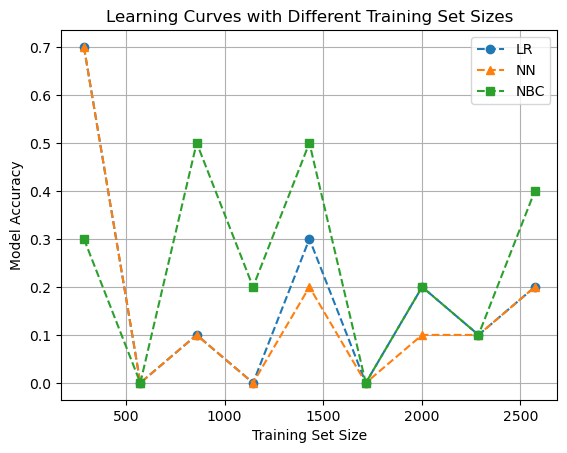

In [64]:
# features = [
#     'season', 'round', 'driver_points', 'driver_standings_pos', 'driver_wins', 
#     'constructor_points', 'constructor_standings_pos', 'constructor_wins',
#     'fp_pos_1', 'fp_time_1', 'fp_pos_2', 'fp_time_2', 'fp_pos_3', 'fp_time_3',
#     'weather_cloudy', 'weather_cold', 'weather_dry', 'weather_warm', 'weather_wet'
# ]

features = ['season', 'round', 'driver_points', 'driver_standings_pos', 'driver_wins',
            'constructor_points', 'constructor_standings_pos', 'constructor_wins']
additional_features = ['fp_pos_1', 'fp_time_1', 'fp_pos_2', 'fp_time_2', 'fp_pos_3', 'fp_time_3']
features = features + additional_features

data = pd.read_csv('./data/preprocessed_df.csv')
# data['top_10_finish'] = np.where(data['podium'] <= 10, 1, 0)
data['season_end_top_10'] = data.groupby('season')['driver_points'].transform(lambda x: x >= x.nlargest(10).min())

X = data[features]
# y = data['podium']
# y = data['top_10_finish']
y = data['season_end_top_10']

X_train = X[data['season'] < 2022]
y_train = y[data['season'] < 2022]
X_test = X[data['season'] == 2022]

data_w_points = pd.read_csv('./data/final_df.csv')
y_test = data_w_points[data_w_points['season'] == 2022]
y_test = y_test.groupby('driver_name')['points'].sum().reset_index()
y_test = y_test.sort_values('points', ascending=False)
y_test = y_test.iloc[0:10].reset_index(drop=True)
# y_test computes the actual final standing for each driver at the end of the season


#  ===

X_train_partitions = np.array_split(X_train, 10) # for different train sizes
y_train_partitions = np.array_split(y_train, 10) # for different train sizes

lr_accs = []
nn_accs = []
nbc_accs = []
train_size = []
X_train_var = pd.DataFrame()
y_train_var = pd.DataFrame()
for i in range(len(X_train_partitions)-1, 0, -1):
    X_train_var = pd.concat([X_train_var, pd.DataFrame(X_train_partitions[i])])
    y_train_var = pd.concat([y_train_var, pd.DataFrame(y_train_partitions[i])])
    
    X_train_var = X_train_var.sort_index()
    # print(X_train_var.shape)
    # display(X_train_var)

    (lr_pred, lr_acc, lr_mapped_revs, lr_ideal_revs, lr_champ, lr_champ_pts) = lr(X_train_var, y_train_var, X_test, y_test)
    (nn_pred, nn_acc, nn_mapped_revs, nn_ideal_revs, nn_champ, nn_champ_pts) = nn(X_train_var, y_train_var, X_test, y_test)
    (nbc_pred, nbc_acc, nbc_mapped_revs, nbc_ideal_revs, nbc_champ, nbc_champ_pts) = nbc(X_train_var, y_train_var, X_test, y_test)
    train_size.append(X_train_var.shape[0])
    lr_accs.append(lr_acc)
    nn_accs.append(nn_acc)
    nbc_accs.append(nbc_acc)

plt.figure()
plt.plot(train_size, lr_accs, linestyle='--', marker='o', label='LR')
plt.plot(train_size, nn_accs, linestyle='--', marker='^', label='NN')
plt.plot(train_size, nbc_accs, linestyle='--', marker='s', label='NBC')
plt.xlabel('Training Set Size')
plt.ylabel('Model Accuracy')
plt.legend()
plt.title('Learning Curves with Different Training Set Sizes')
plt.grid(True)
plt.show()


	y_test	        y_pred

0	max verstappen	max verstappen  1

1	charles leclerc	charles leclerc 1

2	sergio perez	sergio perez    1

3	george russell	carlos sainz    0

4	lewis hamilton	george russell  0

5	carlos sainz	lewis hamilton  0

6	lando norris	lando norris    1

7	esteban ocon	esteban ocon    1

8	fernando alonso	fernando alonso 1

9	valtteri bottas	valtteri bottas 1

acc = 7/10

# Original LR Untouched

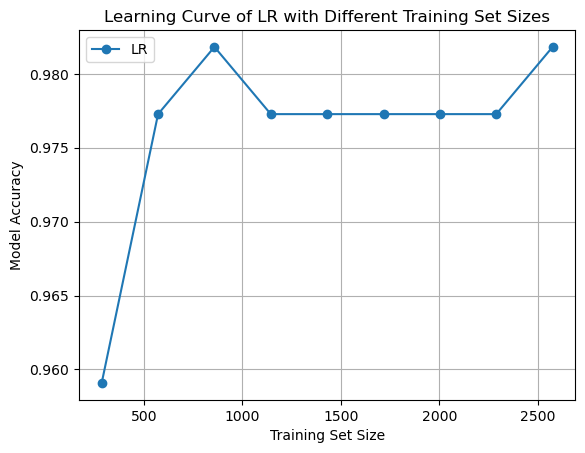

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('./data/preprocessed_df.csv')
data_w_points = pd.read_csv('./data/final_df.csv')

def lr(X_train, y_train, X_test, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    logreg = LogisticRegression()
    logreg.fit(X_train_scaled, y_train)

    probabilities = logreg.predict_proba(X_test_scaled)[:, 1]

    data_2022 = data[data['season'] == 2022].copy()
    data_2022['predicted_probability'] = probabilities

    driver_probabilities = data_2022.groupby('driver_name')['predicted_probability'].mean().sort_values(ascending=False)
    top_10_finishers = driver_probabilities.head(10)

    y_pred = logreg.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    return (y_pred, accuracy, top_10_finishers)

features = [
    'season', 'round', 'driver_points', 'driver_standings_pos', 'driver_wins', 
    'constructor_points', 'constructor_standings_pos', 'constructor_wins',
    'fp_pos_1', 'fp_time_1', 'fp_pos_2', 'fp_time_2', 'fp_pos_3', 'fp_time_3',
    'weather_cloudy', 'weather_cold', 'weather_dry', 'weather_warm', 'weather_wet'
]

data['season_end_top_10'] = data.groupby('season')['driver_points'].transform(lambda x: x >= x.nlargest(10).min())

X = data[features]
y = data['season_end_top_10']

X_train = X[data['season'] < 2022]
y_train = y[data['season'] < 2022]
X_test = X[data['season'] == 2022]
y_test = y[data['season'] == 2022]

X_train_partitions = np.array_split(X_train, 10) # for different train sizes
y_train_partitions = np.array_split(y_train, 10) # for different train sizes

lr_accs = []
train_size = []
X_train_var = pd.DataFrame()
y_train_var = pd.DataFrame()
for i in range(len(X_train_partitions)-1, 0, -1):
    X_train_var = pd.concat([X_train_var, pd.DataFrame(X_train_partitions[i])])
    y_train_var = pd.concat([y_train_var, pd.DataFrame(y_train_partitions[i])])
    
    X_train_var = X_train_var.sort_index()
    # print(X_train_var.shape)
    # display(X_train_var)

    (lr_pred, lr_acc, lr_top10) = lr(X_train_var, y_train_var, X_test, y_test)
    train_size.append(X_train_var.shape[0])
    lr_accs.append(lr_acc)

plt.figure()
plt.plot(train_size, lr_accs, marker='o', label='LR')
plt.xlabel('Training Set Size')
plt.ylabel('Model Accuracy')
plt.legend()
plt.title('Learning Curve of LR with Different Training Set Sizes')
plt.grid(True)
plt.show()

For every driver, is it in the top 10 (true or false)

For all rounds in season 2022, each driver has either true or false

                    actual  pred

2022, 1, driver1,   true,   true    1

2022, 1, driver2,   false,  true    0

2022, 1, driver3,   true,   false   0

2022, 1, driver4,   false,  false   1

2022, 1, driver5,   true,   false   0

2022, 1, driver6,   false,  fasle   1

acc = 3/6

# Original NN Untouched
**Notice that this implementation uses the second method!**
```
data['top_10_finish'] = np.where(data['podium'] <= 10, 1, 0)
X = data[all_features]
y = data['top_10_finish']
```

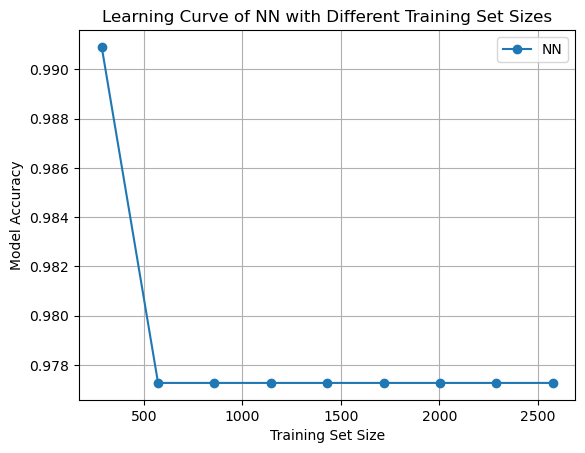

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

data = pd.read_csv('./data/preprocessed_df.csv')

def nn(X_train, y_train, X_test, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    neuralnet = MLPClassifier(solver='sgd', batch_size= 100, random_state=0, max_iter=1000)
    neuralnet.fit(X_train_scaled, y_train)

    probabilities = neuralnet.predict_proba(X_test_scaled)[:, 1]

    data_2022 = data[data['season'] == 2022].copy()
    data_2022['predicted_probability'] = probabilities

    driver_probabilities = data_2022.groupby('driver_name')['predicted_probability'].mean().sort_values(ascending=False)
    top_10_finishers = driver_probabilities.head(10)

    y_pred = neuralnet.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    return (y_pred, accuracy, top_10_finishers)

features = [
    'season', 'round', 'driver_points', 'driver_standings_pos', 'driver_wins', 
    'constructor_points', 'constructor_standings_pos', 'constructor_wins',
    'fp_pos_1', 'fp_time_1', 'fp_pos_2', 'fp_time_2', 'fp_pos_3', 'fp_time_3',
    'weather_cloudy', 'weather_cold', 'weather_dry', 'weather_warm', 'weather_wet'
]

data['season_end_top_10'] = data.groupby('season')['driver_points'].transform(lambda x: x >= x.nlargest(10).min())

X = data[features]
y = data['season_end_top_10']

# X = data[all_features]
# y = data['top_10_finish']

X_train = X[data['season'] < 2022]
y_train = y[data['season'] < 2022]
X_test = X[data['season'] == 2022]
y_test = y[data['season'] == 2022]

X_train_partitions = np.array_split(X_train, 10) # for different train sizes
y_train_partitions = np.array_split(y_train, 10) # for different train sizes

nn_accs = []
train_size = []
X_train_var = pd.DataFrame()
y_train_var = pd.DataFrame()
for i in range(len(X_train_partitions)-1, 0, -1):
    X_train_var = pd.concat([X_train_var, pd.DataFrame(X_train_partitions[i])])
    y_train_var = pd.concat([y_train_var, pd.DataFrame(y_train_partitions[i])])
    
    X_train_var = X_train_var.sort_index()
    # print(X_train_var.shape)
    # display(X_train_var)

    (nn_pred, nn_acc, nn_top10) = nn(X_train_var, y_train_var, X_test, y_test)
    train_size.append(X_train_var.shape[0])
    nn_accs.append(nn_acc)

plt.figure()
plt.plot(train_size, nn_accs, marker='o', label='NN')
plt.xlabel('Training Set Size')
plt.ylabel('Model Accuracy')
plt.legend()
plt.title('Learning Curve of NN with Different Training Set Sizes')
plt.grid(True)
plt.show()


# Original NBC Untouched

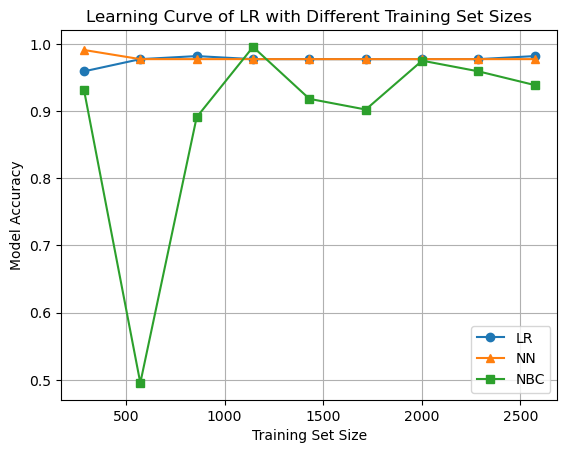

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('./data/preprocessed_df.csv')
data_w_points = pd.read_csv('./data/final_df.csv')

def nbc(X_train, y_train, X_test, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    nbc = GaussianNB()
    nbc.fit(X_train_scaled, y_train)

    probabilities = nbc.predict_proba(X_test_scaled)[:, 1]

    data_2022 = data[data['season'] == 2022].copy()
    data_2022['predicted_probability'] = probabilities

    driver_probabilities = data_2022.groupby('driver_name')['predicted_probability'].mean().sort_values(ascending=False)
    top_10_finishers = driver_probabilities.head(10)

    y_pred = nbc.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    return (y_pred, accuracy, top_10_finishers)

features = [
    'season', 'round', 'driver_points', 'driver_standings_pos', 'driver_wins', 
    'constructor_points', 'constructor_standings_pos', 'constructor_wins',
    'fp_pos_1', 'fp_time_1', 'fp_pos_2', 'fp_time_2', 'fp_pos_3', 'fp_time_3',
    'weather_cloudy', 'weather_cold', 'weather_dry', 'weather_warm', 'weather_wet'
]

data['season_end_top_10'] = data.groupby('season')['driver_points'].transform(lambda x: x >= x.nlargest(10).min())

X = data[features]
y = data['season_end_top_10']

X_train = X[data['season'] < 2022]
y_train = y[data['season'] < 2022]
X_test = X[data['season'] == 2022]
y_test = y[data['season'] == 2022]

X_train_partitions = np.array_split(X_train, 10) # for different train sizes
y_train_partitions = np.array_split(y_train, 10) # for different train sizes

nbc_accs = []
train_size = []
X_train_var = pd.DataFrame()
y_train_var = pd.DataFrame()
for i in range(len(X_train_partitions)-1, 0, -1):
    X_train_var = pd.concat([X_train_var, pd.DataFrame(X_train_partitions[i])])
    y_train_var = pd.concat([y_train_var, pd.DataFrame(y_train_partitions[i])])
    
    X_train_var = X_train_var.sort_index()
    # print(X_train_var.shape)
    # display(X_train_var)

    (nbc_pred, nbc_acc, nbc_top10) = nbc(X_train_var, y_train_var, X_test, y_test)
    train_size.append(X_train_var.shape[0])
    nbc_accs.append(nbc_acc)

plt.figure()
plt.plot(train_size, lr_accs, marker='o', label='LR')
plt.plot(train_size, nn_accs, marker='^', label='NN')
plt.plot(train_size, nbc_accs, marker='s', label='NBC')
plt.xlabel('Training Set Size')
plt.ylabel('Model Accuracy')
plt.legend()
plt.title('Learning Curve of LR with Different Training Set Sizes')
plt.grid(True)
plt.show()

Merging the "Originals"